# Training Regression Models for Predictions on House Pricing 

## **Defining the Question** 

### a) **Specifying the Data Analytic Question**



To find correlations between varoius features that can be essential in validating the pricing of houses in Real Estate and using these features to create the model that can help make accurate predictions on how houses should cost.

### b) **Defining the Metrics of Success**

> The project will be considered succesful after the data is cleaned and a perfomance of explaroratory analysis is conducted on the dataset thereby determining variuos corrrelations between the variables which will inturn come in handy in the application of our regression models

> The regression models are developed and results of their accuracu are compared to the baseline model

### c) **Understanding the Context**


Hass Consulting Company is a real estate leader with over 25 years of experience. This study will study the factors that affect housing prices using the given information on real estate properties owned that was collected over the past few months. We will then create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


### d) **Experimental Design**

> In this study, we will be conducting Exploratory Data Analysis to study the relationships between the different variables. Later we will create a number of regression models to try find the most accurate model to predict housing prices

### c) **Data Relevance**

Our data contains variables that affect housing price and prices of the houses 

**Definition of variables:**

Id - Identification No. specific to each House

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above : Square feet area of the roof

sqft_basement - Square feet area of basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15: Square feet area of living area extended to outside the house 
 

sqft_lot15>  Square feet area of The Hygeinic Dumping Pits aside the House

## **2. Loading our Libraries**

In [458]:
# Importing our libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression, LogisticRegression

import scipy.stats as sp

## **3. Loading our DataSets**

In [459]:
# Loading the Dataset
# Dataset url = http://bit.ly/EcommerceDataset 
#

housings = pd.read_csv('Independent Project Week 7 - house_data.csv')
housings.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **4. Checking our DataSets**

In [460]:


# 
# We create a function that will enable us to check for various information about our dataset
# Determining the no. of records in our dataset the N0. of colums, the duplicates, datatypes 
# and if there are any null values and duplicates

def check(data):
    df = data.shape
    df1 = data.isnull().value_counts()
    df2 = data.duplicated().value_counts()
    df3 = data.columns
    df4 = data.info()
    df5 = data.dtypes
    


    print('Data_Shape',"\n", df,"\n")
    print('Columns',"\n", df3,"\n") 
    print('Data info',"\n", df4,"\n")
    print('Data types',"\n", df5,"\n")
    print('Checking for No. of null values',"\n", df1,"\n") 
    print('Checking for No. of duplicates',"\n", df2) 

In [461]:
check(housings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [462]:
#Checking for the  no. of unique values in each column
housings.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [463]:
housings.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **5. Cleaning our DataSets**

In [464]:
## Choosing Relevant Columns
cols_use = ['id' ,'zipcode', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',  'sqft_living15', 'sqft_lot15','yr_built',  ]

In [465]:
housing = housings[cols_use]
housing.head(5)

,id,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built
0,7129300520,98178,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1340,5650,1955
1,6414100192,98125,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1690,7639,1951
2,5631500400,98028,180000.0,2,1.00,770,10000,1.0,3,6,770,0,2720,8062,1933
3,2487200875,98136,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1360,5000,1965
4,1954400510,98074,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1800,7503,1987


In [466]:
housing.drop_duplicates()

,id,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built
0,7129300520,98178,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1340,5650,1955
1,6414100192,98125,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1690,7639,1951
2,5631500400,98028,180000.0,2,1.00,770,10000,1.0,3,6,770,0,2720,8062,1933
3,2487200875,98136,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1360,5000,1965
4,1954400510,98074,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1800,7503,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,98103,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,1530,1509,2009
21609,6600060120,98146,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,1830,7200,2014
21610,1523300141,98144,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,1020,2007,2009
21611,291310100,98027,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,1410,1287,2004


In [467]:
housing.isna().sum()

id               0
zipcode          0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
yr_built         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x257281c5550>,
 'caps': [<matplotlib.lines.Line2D at 0x257281c5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x257281c51c0>],
 'medians': [<matplotlib.lines.Line2D at 0x25727ccb3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25727ccb760>],
 'means': []}

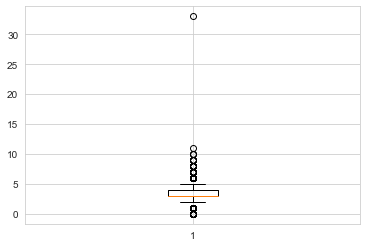

In [468]:
# Tracing Ouliers and Anomalies
plt.boxplot(x = housing['bedrooms'])

In [469]:
# ReMOVING aNOMALIES
housing.replace({'bedrooms': 33}, {'bedrooms' : 3}, regex = True, inplace = True)
housing['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10], dtype=int64)

## **6. Exploratory Analysis**


### **Central Tendencies**

In [ ]:
Index(['id', 'zipcode', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built'

In [502]:
housing['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [513]:
x = housing['bathrooms'].mode()

y = housing['bedrooms'].mode()

z = housing['grade'].mode()

v = housing['condition'].mode()

a = housing['floors'].mode()

b = housing['yr_built'].mode()



print(f'Bedrooms are mostly {y} \n')

print(f'Grading (/15) of the quality of house is mostly {z} \n')

print(f'Conditions(/10) or state of the houses are mosly rated at are mostly {v} \n')

print(f'Most houses were built in the year {b} \n')

print(f'No of floors in most houses is {a} \n')

# print(f'most houses have{y}bedrooms' '/n)

# print(f'most houses have{z} grading' '/n)

# print(f'most houses have{v} condition of quality' '/n)


Bedrooms are mostly 0    3
dtype: int64 

Grading (/15) of the quality of house is mostly 0    7
dtype: int64 

Conditions(/10) or state of the houses are mosly rated at are mostly 0    3
dtype: int64 

Most houses were built in the year 0    2014
dtype: int64 

No of floors in most houses is 0    1.0
dtype: float64 



In [510]:
central = ['price', 'sqft_living','sqft_lot', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15']
central = housing[central]

central.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1986.552492,12768.455652
std,3.673622e+05,918.440897,4.142051e+04,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000


### **Univariate and Bivariate Analysis**

Text(0.5, 1.0, 'The Frequency of the Ages of The buildings')

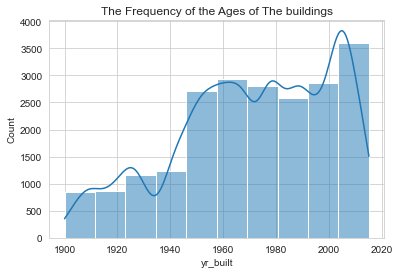

In [470]:
ax = sns.histplot(data = housing, x = 'yr_built',edgecolor= 'white', bins = 10, kde = True)
ax.set_title('The Frequency of the Ages of The buildings')

**Most of the buildings were constructed between the 1960s and 2000**
**Between 2000 to 2020 there was a peak increase in construction of houses as the real estate became a prospective investment**

Text(0.5, 1.0, 'Grouping houses per year in relation to their Prices')

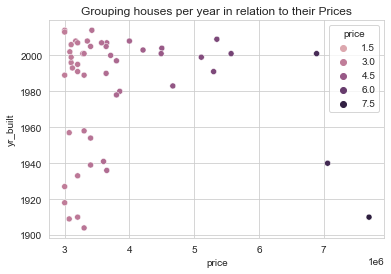

In [471]:
# Grouping houses per year in relation to their Prices

group = housing['price'].sort_values(ascending = False).head(50)
ax = sns.scatterplot(data = housing, x = group, y = 'yr_built' , hue = 'price')
ax.set_title ('Grouping houses per year in relation to their Prices')

**Modern houses built from the 1980s to the 2000s tend to be more costly to those contructed in the 1960s this might be as a result of maintainence**

Text(0.5, 1.0, 'Frequency of Prices')

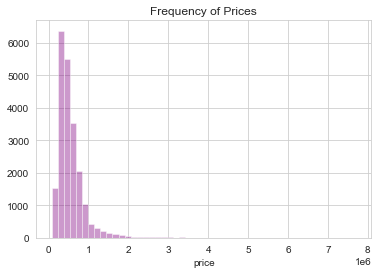

In [472]:
# The cost of houses 

sns.set_style('whitegrid')
ax =sns.distplot(housing['price'],kde = False, color = 'purple')
ax.set_title('Frequency of Prices')

**Most houses cost less than a million according to the survey**

In [473]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

In [474]:
# housing_plot = housing()
fig =  px.scatter(housing, x = 'bedrooms', y ='price', color = 'bedrooms' , title = 'The cost of Houses in relation to the No. of Bedrooms' )

fig.show()


**The most Expensive houses are the ones with more 6 bedrooms followed by 5 bedrooms the four bedrooms**

In [482]:
# housing_plot = housing()
fig =  px.scatter(housing, x = 'sqft_living', y ='price', color = 'bedrooms'  , title = 'The cost of Houses in relation to the No. of sqft_living room' )

fig.show()

**The larger the size of the living room the more costly the apartment is**

In [339]:
x = housing.groupby(['zipcode'])['price'].sum().sort_values(ascending = False).head(20)
new = pd.DataFrame(x)
new.columns

Index(['price'], dtype='object')

In [484]:

fig =  px.bar(new, x = new.index , y = 'price', color = 'price', title = 'Zipcodes with the most expensive houses')

fig.show()


**Zipcode 98052, 98103 and 98115 seem to have the most expensive address on the surveys it might have something to do with the convinience of these locations or the proper structuring of apartments in the area**

## **7. Regression & Modelling**

### **Correlations**

In [341]:
opt = housing['bedrooms'].unique()
opt 

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10], dtype=int64)

In [342]:
housing.columns

Index(['id', 'zipcode', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built'],
      dtype='object')

<AxesSubplot:>

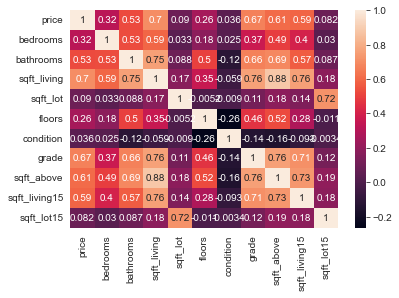

In [343]:
# Find correlations between different independent variables in the datasets to the dependent variable
housing_corr = housing[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']]
sns.heatmap(housing_corr.corr(method = 'pearson'), annot = True)

In [344]:
housing_corr.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15
price,1.000000,0.315427,0.525134,0.702044,0.089655,0.256786,0.036392,0.667463,0.605566,0.585374,0.082456
bedrooms,0.315427,1.000000,0.529163,0.591471,0.032811,0.181098,0.025428,0.366509,0.490605,0.402633,0.030408
bathrooms,0.525134,0.529163,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.568634,0.087175
sqft_living,0.702044,0.591471,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.756420,0.183286
sqft_lot,0.089655,0.032811,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.144608,0.718557
floors,0.256786,0.181098,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,0.279885,-0.011269
condition,0.036392,0.025428,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,-0.092824,-0.003406
grade,0.667463,0.366509,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.713202,0.119248
sqft_above,0.605566,0.490605,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,0.731870,0.194050
sqft_living15,0.585374,0.402633,0.568634,0.756420,0.144608,0.279885,-0.092824,0.713202,0.731870,1.000000,0.183192


**We choose the columns with the most correlation to the Price which is our target variable which is being led by sqft_living**

### **(i) Linear Regression**

In [345]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
# accuracy_score(admit_test, admit_predict)

X = housings[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15','sqft_above', 'floors', 'grade', 'sqft_lot15','condition', 'sqft_lot', 'waterfront','yr_built', 'view']].values
y = housings['price'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# from sklearn.preprocessing import StandardScaler
# feature_scaler = StandardScaler()
# X_train = feature_scaler.fit_transform(X_train)
# X_test = feature_scaler.transform(X_test)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)







540745.3849505231
[ -33544.23645573   30756.24312286  158035.08158729   21083.33374547
  -12670.361065     17788.93155724  139398.10492558  -15783.26502988
   12474.9940556     1702.01456323   53054.00025055 -105128.09952033
   31714.99029745]


In [346]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y_test, y_pred))

Mean squared error: 47320648328.83
Coefficient of determination: 0.64


**The accuracy of the model is 64% and it's mean square Error Mean squared error: 47320648328.83**

**This was our baseline Regression Model (Linear Regression)**

In [ ]:
y_pred= regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,5.404000e+03,5.404000e+03
mean,5.351942e+05,5.374468e+05
std,3.647467e+05,2.895500e+05
min,8.200000e+04,-3.653576e+05
25%,3.193750e+05,3.380682e+05
50%,4.445000e+05,4.782179e+05
75%,6.370000e+05,6.711132e+05
max,6.890000e+06,2.654906e+06


**The data description shows some almost accurate prediction and it is clear that there is no overfitting**

### **(ii) Heteroscadascicity Testing using the Barlett's Test**

In [ ]:
from scipy.stats import bartlett
from scipy.stats import chi2
residuals = y_pred - y_test
test_result, p_value = bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
      print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



the variances are homogeneous!


**The data has a normal distribution as the variances are not unevenly distributed along the dataset therefore it wouldn't work so well with regressions such as Quantile regression**

### **(iii) Quantile Regression**

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['axes.titleweight'] = 700

In [349]:
import statsmodels.formula.api as smf
hqx = housings[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15','sqft_above', 'floors', 'grade', 'sqft_lot15','condition', 'sqft_lot', 'waterfront','yr_built', 'view']]
hqy = housing['price'] 

hqx_train, hqx_test, hqy_train, hqy_test = train_test_split(hqx, hqy, test_size = 0.3, random_state = 0)


model = smf.quantreg('hqy ~ hqx', hqx)

r = model.fit(q = .80)

r.summary()

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    hqy   Pseudo R-squared:               0.4775
Model:                       QuantReg   Bandwidth:                   2.187e+04
Method:                 Least Squares   Sparsity:                    5.280e+05
Date:                Mon, 18 Oct 2021   No. Observations:                21613
Time:                        02:01:34   Df Residuals:                    21599
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.33e+06    1.4e+05     37.981      0.000    5.06e+06    5.61e+06
hqx[0]     -3.259e+04   2339.315    -13.930      0.000   -3.72e+04    -2.8e+04
hqx[1]      2.213e+04   3585.577      6.171      0.000    1.51e+04    2.92e+04
hqx[2]       185.6827      4.792     38.746      0.000     176.289     195.076
hqx[3]        42.0409      4.160     10.105      0.000      33.886      50.195
hqx[4]       -48.7854      4.666    -10.456      0.000     -57.930     -39.640
hqx[5]      4.398e+04   4081.908     10.775      0.000     3.6e+04     5.2e+04
hqx[6]      1.246e+05   2410.222     51.694      0.000     1.2e+05    1.29e+05
hqx[7]        -0.5019      0.086     -5.852      0.000      -0.670      -0.334
hqx[8]      1.852e+04   2506.664      7.388      0.000    1.36e+04    2.34e+04
hqx[9]         0.1884      0.056      3.344      0.001       0.078       0.299
hqx[10]     9.338e+05   1.82e+04     51.198      0.000    8.98e+05     9.7e+05
hqx[11]    -3092.3337     72.707    -42.531      0.000   -3234.845   -2949.822
hqx[12]      5.54e+04   2185.082     25.356      0.000    5.11e+04    5.97e+04
==============================================================================

The condition number is large, 4.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [364]:
hqx.head(5)

,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_above,floors,grade,sqft_lot15,condition,sqft_lot,waterfront,yr_built,view
0,3,1.00,1180,1340,1180,1.0,7,5650,3,5650,0,1955,0
1,3,2.25,2570,1690,2170,2.0,7,7639,3,7242,0,1951,0
2,2,1.00,770,2720,770,1.0,6,8062,3,10000,0,1933,0
3,4,3.00,1960,1360,1050,1.0,7,5000,5,5000,0,1965,0
4,3,2.00,1680,1800,1680,1.0,8,7503,3,8080,0,1987,0


In [365]:
hqx.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_above',
       'floors', 'grade', 'sqft_lot15', 'condition', 'sqft_lot', 'waterfront',
       'yr_built', 'view'],
      dtype='object')

In [367]:
quantiles = np.arange(0.25,0.5,0.75)

models = []

parameters = []

for tiles in quantiles:
    rs = model.fit(q = tiles)
    models.append(rs)
    parameters.append([tiles, rs.params['Intercept'], rs.params['hqx[0]'],rs.params['hqx[1]'],rs.params['hqx[2]'],rs.params['hqx[3]'],rs.params['hqx[4]'],rs.params['hqx[5]'],rs.params['hqx[6]'],rs.params['hqx[7]'],rs.params['hqx[8]'],rs.params['hqx[9]'],rs.params['hqx[10]'],rs.params['hqx[11]'],rs.params['hqx[12]']]+ rs.conf_int().loc['hqx[0]'].tolist()+ rs.conf_int().loc['hqx[1]'].tolist()+ rs.conf_int().loc['hqx[2]'].tolist()+ rs.conf_int().loc['hqx[3]'].tolist()+ rs.conf_int().loc['hqx[4]'].tolist()+ rs.conf_int().loc['hqx[5]'].tolist()+ rs.conf_int().loc['hqx[6]'].tolist()+ rs.conf_int().loc['hqx[7]'].tolist()+ rs.conf_int().loc['hqx[8]'].tolist()+ rs.conf_int().loc['hqx[9]'].tolist()+ rs.conf_int().loc['hqx[10]'].tolist()+ rs.conf_int().loc['hqx[11]'].tolist()+ rs.conf_int().loc['hqx[12]'].tolist() )

    parameter = pd.DataFrame(parameters, columns = ['quantiles', 'Intercept', 'coef-bedrooms','coef-bathrooms','coef-sqft_living','coef-sqft_living15', 'coef-sqft_above' , 'coef- floors', 'coef- grade', 'coef- sqft_lot15','coef- condition', 'coef- sqft_lot', 'coef- waterfront','coef- yr_built', 'coef- view','lowerbound_bedrooms', 'lowerbound_bathrooms', 'lowerbound_sqft_living', 'lowerbound_sqft_living15', 'lowerbound_sqft_above','lowerbound_floors', 'lowerbound_grade', 'lowerbound_sqft_lot15', 'lowerbound_condition', 'lowerbound_sqft_lot', 'lowerbound_waterfront','lowerbound_yr_built', 'lowerbound_view','upperbound_bedrooms', 'upperbound_bathrooms', 'upperbound_sqft_living', 'upperbound_sqft_living15', 'upperbound_sqft_above','upperbound_floors', 'upperbound_grade', 'upperbound_sqft_lot15', 'upperbound_condition', 'upperbound_sqft_lot', 'upperbound_waterfront','upperbound_yr_built', 'upperbound_view'])



C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39

In [370]:
parameter

,quantiles,Intercept,coef-bedrooms,coef-bathrooms,coef-sqft_living,coef-sqft_living15,coef-sqft_above,coef- floors,coef- grade,coef- sqft_lot15,...,upperbound_sqft_living15,upperbound_sqft_above,upperbound_floors,upperbound_grade,upperbound_sqft_lot15,upperbound_condition,upperbound_sqft_lot,upperbound_waterfront,upperbound_yr_built,upperbound_view
0,0.1,2.315294e+06,-14612.808247,21056.598676,81.817845,33.060875,-36.838372,48601.592149,63343.368244,0.064520,...,13013.058392,19820.946824,-0.016986,0.165413,1.041004e+05,1.558244e+05,-1485.034072,-1324.395142,21090.964641,27423.753633
1,0.2,3.625144e+06,-19246.025567,20818.693142,88.575614,51.486748,-36.563921,54012.400076,89449.265164,-0.137277,...,11695.889980,18693.514766,0.041009,0.195258,1.563279e+05,2.096108e+05,-2247.905356,-2070.157137,20573.243224,27115.420979
2,0.3,4.601230e+06,-22613.887775,29555.570862,95.604383,54.920899,-33.204906,55203.838558,97818.475785,-0.249038,...,13573.766134,21227.220642,-0.000033,0.156102,2.769579e+05,3.348850e+05,-2786.960775,-2585.213059,24210.216588,31318.501397
3,0.4,4.255211e+06,-21899.452959,21913.610715,113.600132,47.413938,-42.697309,52502.596981,107275.317351,-0.300626,...,18420.521237,25849.938739,-0.008030,0.145388,3.585814e+05,4.146916e+05,-2628.182866,-2429.402489,27330.044879,34208.491211
4,0.5,4.865503e+06,-26866.519270,23527.461983,130.099432,43.270644,-38.509039,54654.793321,109308.696689,-0.325672,...,20785.493546,28389.366933,0.020254,0.178596,4.394250e+05,4.968780e+05,-2949.047018,-2741.163479,34180.894028,41197.019201
5,0.6,2.905403e+06,-33873.091005,19201.361309,169.449773,22.421091,-44.389002,30363.803945,106717.980705,-0.402942,...,39637.003894,47509.182934,0.012777,0.177703,5.565649e+05,6.152336e+05,-1950.187960,-1726.527677,42524.198678,49722.491362
6,0.7,5.396339e+06,-30057.012664,26930.481930,151.319713,38.704010,-38.022275,45923.235130,119697.120909,-0.392893,...,16749.808798,25168.141445,0.045678,0.230640,7.446911e+05,8.078526e+05,-3237.928705,-2999.883073,44516.274990,52138.682495
7,0.8,5.330354e+06,-32586.341406,22127.731559,185.682720,42.040936,-48.785375,43981.050938,124593.505436,-0.501901,...,13604.830637,23431.324270,0.078001,0.298878,8.980392e+05,9.695382e+05,-3234.845111,-2949.822323,51121.810935,59687.654832
8,0.9,1.746948e+04,-19527.675807,-39121.985621,241.614054,73.476675,-39.145329,1796.185376,125549.326161,-0.879625,...,45644.350472,60928.084896,0.020843,0.353452,1.079279e+06,1.167352e+06,-687.841551,-177.754888,86240.018338,97642.869035


Text(0.5, 1.0, 'Bathrooms: Quantile regression')

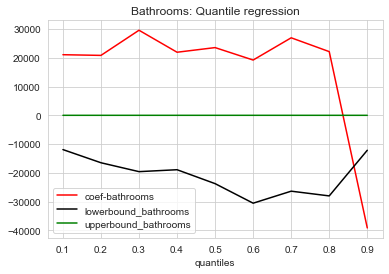

In [372]:
parameter.plot(x='quantiles', y=['coef-bathrooms', 'lowerbound_bathrooms', 'upperbound_bathrooms'], kind= 'line', color=['red','black','green'])
plt.title("Bathrooms: Quantile regression")

Text(0.5, 1.0, 'Bedrooms: Quantile regression')

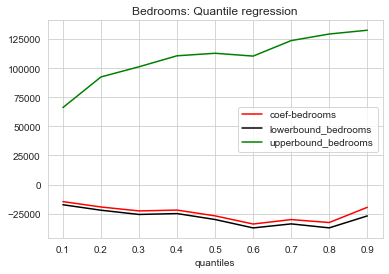

In [486]:
parameter.plot(x='quantiles', y=['coef-bedrooms', 'lowerbound_bedrooms', 'upperbound_bedrooms'], kind= 'line', color=['red','black','green'])
plt.title("Bedrooms: Quantile regression")

Text(0.5, 1.0, 'sqft_living: Quantile regression')

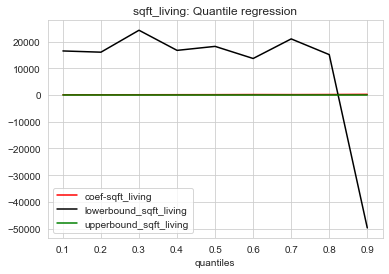

In [485]:
parameter.plot(x='quantiles', y=['coef-sqft_living', 'lowerbound_sqft_living', 'upperbound_sqft_living'], kind= 'line', color=['red','black','green'])
plt.title("sqft_living: Quantile regression")

In [378]:
import statsmodels.regression.quantile_regression as Q_reg


quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(hqy, hqx).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['parameters'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(hqy, hqx).fit(q=0.25).predict(hqx)
Y_test_pred2 = Q_reg.QuantReg(hqy, hqx).fit(q=0.5).predict(hqx)
Y_test_pred3 = Q_reg.QuantReg(hqy, hqx).fit(q=0.75).predict(hqx)
r2_50 = r2_score(hqy,Y_test_pred2)
r2_25 = r2_score(hqy,Y_test_pred1)
r2_75 = r2_score(hqy,Y_test_pred3)
print('R2 score for the 50th percentile is {}'.format(r2_50) ) 
print('R2 score for the 25th percentile is {}'.format(r2_25) ) 
print('R2 score for the 75th percentile is {}'.format(r2_75) ) 

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



R2 score for the 50th percentile is 0.5854626530605128
R2 score for the 25th percentile is 0.41385128641387603
R2 score for the 75th percentile is 0.5495530056655975


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



**In relation to the basline model it has underperfomed as the 50th perceentile has 58% accuracy, 25th percentile having 41% accuracy and 75th percentile having 54% accuracy, while the baseline had a mean accuracy of 64%**

### **(iv) Ridge Regression**

In [375]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [421]:
hrx = housings[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15','sqft_above', 'floors', 'grade', 'sqft_lot15','condition', 'sqft_lot', 'waterfront','yr_built', 'view']]
hry = housings['price'] 

# Scaling data 
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hrx)
hrx = scaler.transform(hrx)
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
XR_train, XR_test, yR_train, yR_test = train_test_split(hrx, hry, test_size = 0.2, random_state=25)

In [422]:
regression = LinearRegression()
regression.fit(XR_train,yR_train)
first_model = (mean_squared_error(y_true=yR_test,y_pred=regression.predict(XR_test)))
print(first_model)


50743352522.43417


In [423]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [424]:
# estimation of the best accuracy score
search.fit(XR_train,yR_train)
print(search.best_params_)
# {'alpha': 0.01}
abs(search.best_score_) 

{'alpha': 0.001}


46019764729.420525

In [425]:
ridge_reg = Ridge(normalize=True,alpha=0.01)
ridge_reg.fit(XR_train,yR_train)
second_model = (mean_squared_error(y_true=yR_test,y_pred=regression.predict(XR_test)))
print(second_model)

50743352522.43417


In [431]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(yR_test,regression.predict(XR_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(yR_test,regression.predict(XR_test)))

Mean squared error for OLS: 50743352522.43
Coefficient of determination: 0.65


**The error margin in the ridge regression has increased but the variances in the various correlated values has been reduced leading to improving the accuracy of the model by 1% from the baselines estimation of 64% to a 65%**

### **(v) Lasso Regression**

In [399]:
hqx = housings[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15','sqft_above', 'floors', 'grade', 'sqft_lot15','condition', 'sqft_lot', 'waterfront','yr_built', 'view']]
hqy = housings['price']

# Scaling data 
#
scaler = StandardScaler()
#scaler.fit(X)
X = scaler.fit_transform(hqx)

In [401]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(hqx, hqy) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(hqx, hqy)) 
print("lasso MSE:", mean_squared_error(hqy, lasso.predict(hqx))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6536708744171801
lasso MSE: 46736687827.269424
lasso coef: [-3.94893426e+04  4.69584082e+04  1.67120689e+02  2.44625383e+01
 -6.13157799e+00  2.72699704e+04  1.19948009e+05 -5.46397259e-01
  1.84635058e+04 -2.95868904e-03  5.81692936e+05 -3.63124645e+03
  4.34693839e+04]


In [438]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(hqx, hqy, test_size=0.25, random_state=88)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6556349615550405
linear score: 0.655634801658054
lasso MSE: 45346151041.08664
linear MSE: 45346172096.39741
lasso best estimator coef: [-3.84856685e+04  5.23284025e+04  1.63073514e+02  2.21413530e+01
 -1.40964335e+00  2.40299364e+04  1.20413972e+05 -5.18134229e-01
  1.69650929e+04 -3.69828317e-02  6.10085480e+05 -3.73635198e+03
  4.15915452e+04]
linear coef: [-3.84857868e+04  5.23287919e+04  1.63073320e+02  2.21414381e+01
 -1.40995684e+00  2.40303776e+04  1.20414130e+05 -5.18133871e-01
  1.69654114e+04 -3.69821177e-02  6.10100550e+05 -3.73635575e+03
  4.15909677e+04]


**The lasso regression increased the accuracy almost 2% as 65.6% to 66and lower the mean square error margin 45346151041.08664 from 47320648328.83**

### **(vi) Elastic Regression**

In [403]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [404]:
#Normalizing data and creating grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [405]:
hqx = housings[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15','sqft_above', 'floors', 'grade', 'sqft_lot15','condition', 'sqft_lot', 'waterfront','yr_built', 'view']]
hqy = housings['price']

XE_train, XE_test, yE_train, yE_test = train_test_split(hqx, hqy, test_size=0.25, random_state=88)
search.fit(XE_train,yE_train)
print(search.best_params_)

abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


47785369596.23649

In [407]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(XE_train,yE_train)
yE_pred=elastic.predict(XE_test)
# print the coefficients 
print('Coefficients: \n', elastic.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(yE_test, yE_pred))

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(yE_test, yE_pred))

Coefficients: 
 [-3.32449936e+04  5.59075058e+04  1.38709797e+02  2.91876586e+01
  1.90985643e+01  1.77742371e+04  1.13040307e+05 -4.96531747e-01
  1.89493033e+04 -4.18572746e-02  5.92318250e+05 -3.54197369e+03
  4.58469966e+04]
Coefficient of determination: 0.65
Mean squared error for OLS: 45451665396.62


**The Elastic Regression which is a combination of both ridge and lasso regression has reduced the error margin from the baseline error of 47320648328.83 to 45451665396.62 using both the techniques of these two models**

## **8. Conclusion**

### **The Lasso Regression is the one recommended for these dataset as it has the most accuracy compared to the other regression techniques 65,6% and error of 45346151041.08664 from 47320648328.83 and 64% perfomed by our baseline model of linear regression** 